## Digital Image Processing, ECE419

Ernesto Colon

The Cooper Union Department of Electrical Engineering


January 24th, 2020

References:
- Digital Image Processing Using Matlab [DIPUM], 3rd ed
- Digital Image Processing, 4th ed

**The following set of notes and example scripts are part of my independent study sessions and adapted from the references outlined above. My main reference is DIPUM and complemented with online documentation. As I go through the theory and textbook examples, I am translating the code and image processing techniques to Python.**

## Intensity Transformations and Spatial Filtering Notes/Exercises/Sandbox

In [1]:
#Importing the libraries
import sys
sys.path.append('C:/Users/ernes/OneDrive - The Cooper Union for the Advancement of Science and Art/Digital Image Processing-Aurora-R11/DIPUM/Scripts')

import numpy as np
import os
import matplotlib.pyplot as plt
#from ec_img_utils import *
import ec_img_utils
from tabulate import tabulate
import skimage
import skimage.util
from skimage import io

## Spatial and Intensity Transformation Functions

Image processing tecniques in the spatial domain operate directly on the pixels of an image. In general, we can represent spatial transformations as follows:

<center> $g(x,y) = T[f(x,y)]$ <\center>

where $g(x,y)$ is the result of applying operator $T[\cdot]$ on input image $f(x,y)$.

If we let $(x_0, y_0)$ denote a pixel of interest, spatial transformations operate on a $n \times n$ neighborhood (rectangular region around pixel) of our pixel. When the spatial transformation neighborhood is of size $1 \times 1$ for a grayscale image, our spatial transformation is simply an intensity transformation. Recall that a grayscale image $f(x,y)$ represents intensity values at each pixel $(x,y)$. Thus, an operator that modifies each individual's pixel intensity is simply an intensity operator/transformation. 

**Example 3.1 from DIPUM - Adjusting image contrast**

Image Information

 | Shape      | Data type   |   Bytes |
|------------|-------------|---------|
| (571, 482) | uint8       |  275222 |





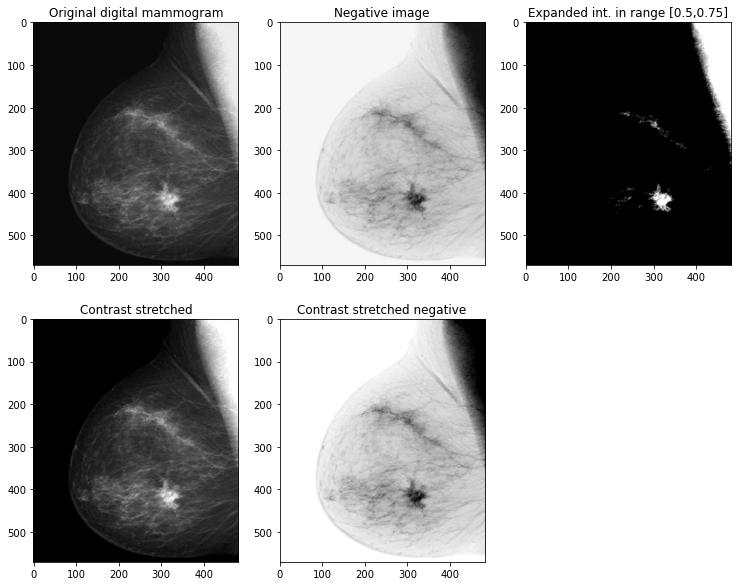

In [2]:
#load the mammogram image
img_mam = io.imread('./images/breastXray.tif')

#get image information
ec_img_utils.get_img_info(img_mam); print('\n\n')

#display the original and processed images
fig_mam, ax_mam = plt.subplots(2,3, figsize=(12.5,10)); ax_mam = ax_mam.ravel()

#display original image
ax_mam[0].imshow(img_mam,cmap='gray'); ax_mam[0].set_title('Original digital mammogram');

#The original image shows a small lesion, but it is hard to see around the dark background. Let's compute the complement of the image or its photographic negative
#The image processing toolbox in Matlab has a function imadjust() that can be used to rescale intensity values for grayscale images. In skimage, the parallel to 
#Matlab's function is skimage.exposure.rescale_intensity() --> the parallels are not exactly 1 to 1, but skimage's function will accomplish our task at hand

#Let's compute the complement of the mammogram by inverting the pixel values.
img_mam_comp = skimage.exposure.rescale_intensity(img_mam, in_range = (0,255), out_range = (255,0))

#display the complement image (photgraphic negative)
ax_mam[1].imshow(img_mam_comp,cmap='gray'); ax_mam[1].set_title('Negative image');

#note how much easier it is to see the lesion in the negative image

#We could have also used skimage.util.invert() to get our complement image

#Expanding the grayscale range [0.5, 0.75] to the full [0,1]
img_mam_pt5_pt75 = skimage.exposure.rescale_intensity(img_mam,in_range=(255*0.5,255*0.75),out_range=(255*0,255*1))

#display the expanded image 
ax_mam[2].imshow(img_mam_pt5_pt75,cmap='gray'); ax_mam[2].set_title('Expanded int. in range [0.5,0.75]');

#Note that the lesion is more visible against the black background

#####################
# CONTRAST STRETCHING
#####################

#From skimage's documentation: 
#Even if an image uses the whole value range, sometimes there is very little weight at the ends of the value range. 
#In such a case, clipping pixel values using percentiles of the image improves the contrast (at the expense of some 
#loss of information, because some pixels are saturated by this operation):

#Matlab accomplishes the same functionality with the stretchlim() function

#contrast stretching
vmin, vmax = np.percentile(img_mam,(1,99))  #get percentile values
img_mam_ctrst_str = skimage.exposure.rescale_intensity(img_mam, in_range=(vmin,vmax),) #top and bottom 1% of pixel values get clipped

#display the contrast stretched image 
ax_mam[3].imshow(img_mam_ctrst_str,cmap='gray'); ax_mam[3].set_title('Contrast stretched');

#Contrast stretch with complement
img_mam_ctrst_str_neg = skimage.exposure.rescale_intensity(img_mam, in_range=(vmin,vmax), out_range=(255,0)) #top and bottom 1% of pixel values get clipped

#display the contrast stretched image 
ax_mam[4].imshow(img_mam_ctrst_str_neg,cmap='gray'); ax_mam[4].set_title('Contrast stretched negative');

#Note the contrast enhanement obtained in the stretched negative relative to the original's negative

fig_mam.delaxes(ax_mam[5])

### Logarithmic and Contrast-Stretching Transformations

The intensity transformations treated in this section are tools for ***dynamic range*** manipulation. With natural images, our objective is typically to enhance the visual perception of an image. With medical images, as the mammogram example shown above, the visual perception enhancements are typically linked with being able to extract meaningful information from the image. In the case of the mammogram image, the contrast enhancement operations we performed allowed a clearer visualization of the tissue lesion.

**Logarithm transformations**

<center> $g(x,y) = c \times log(1 + f(x,y))$ <\center>

Where $c$ is a constant and $f(x,y)$ is an image of floating point *dtype*. 
    
The shape of this transformation is shown below. One of the main uses of a logarithmic transformation is in dynamic range compression. For images with large dynamic ranges (e.g., Fourier transforms with dynamic ranges ~$10^6$), using a log transform results in a narrower dynamic range and we avoid drowning out the low intensity pixels. 
    
Typically, once we have applied the log transformation to our image, we rescale the values to the range [0,1] and finally convert to the desired *dtype* for displaying, printing, etc. 

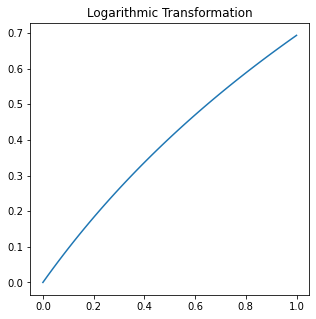

In [3]:
#plotting the shape of the logiartihmic transformation
log_xfm = lambda c, f : c*np.log(1 + f)

inten_in = np.linspace(0,1,endpoint=True) #generate vector of intensity values in range [0,1]
c = 1 #constant in log transformation

fig_log_xfm, ax_log_xfm = plt.subplots(1,1, figsize=(5,5));
ax_log_xfm.plot(inten_in, log_xfm(c, inten_in)); ax_log_xfm.set_title('Logarithmic Transformation');

**Example 3.2 from DIPUM - Using a log function to reduce dynamic range**

Image Information

 | Shape      | Data type   |   Bytes |
|------------|-------------|---------|
| (256, 256) | uint8       |   65536 |


Range --> min: 0.000000, max: 5.545177




Range before conversion back to uint8 dtype --> min: 0.000000, max: 1.000000




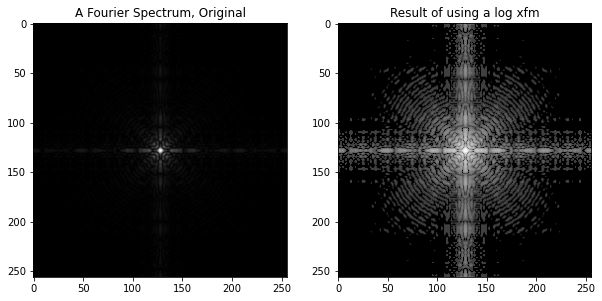

In [4]:
#load Fourier transform image
img_four_spect = io.imread('./images/fourier-spectrum.tif')

ec_img_utils.get_img_info(img_four_spect)

#display the Fourier spectrum image with a high dynamic range --> textbook claims that the frequency domain values range from 0 to 10^6
fig_ft, ax_ft = plt.subplots(1,2,figsize=(10,5)); ax_ft=ax_ft.ravel()
ax_ft[0].imshow(img_four_spect,cmap='gray'); ax_ft[0].set_title('A Fourier Spectrum, Original')

'''
#Convert the image to float before processing
#img_four_spect_float = skimage.util.img_as_float(img_four_spect)

I misinterpreted the textbook when it listed the log transformation c*log(1 + f) with f being a FLOAT. That did not mean to convert the image to the range [0,1], but instead
to pass floating point values to the logarithmic function
'''
#Apply the log transformation to our image with constant c = 1
img_four_spect_log_xfm = log_xfm(1,(img_four_spect).astype(np.float64))
#img_four_spect_log_xfm = np.log(1.0+img_four_spect_float)
#img_four_spect_log_xfm = np.log(1.0+(img_four_spect).astype(np.float64))

#compute range after log transformation
print("\n\nRange --> min: %f, max: %f\n\n" %(np.min(img_four_spect_log_xfm), np.max(img_four_spect_log_xfm)))

#convert back to uint8 after rescaling
scaled = img_four_spect_log_xfm/np.max(img_four_spect_log_xfm)
print("\n\nRange before conversion back to uint8 dtype --> min: %f, max: %f\n\n" %(np.min(scaled), np.max(scaled)))

img_four_spect_log_xfm = skimage.util.img_as_ubyte(scaled)

#display images
ax_ft[0].imshow(img_four_spect,cmap='gray'); ax_ft[0].set_title('A Fourier Spectrum, Original');

ax_ft[1].imshow(img_four_spect_log_xfm,cmap='gray'); ax_ft[1].set_title('Result of using a log xfm');

**Contrast-stretching Transformations**

These type of transformations expand a narrow range of intensity values to a wider range. We saw an example of this with the mammogram image above. 

A contrast stretching transformation has the mathematical form:

<center>$\Large s = T(r) = \frac{1}{1+(k/r)^E}$<\center>
    
Where $s$ is the output image's intensity value, $k$ is a constant and $E$ controls the slope of the function as shown below.
    
Let's visualize a couple of contrast-stretching transformations by varying the functional parameters.
   

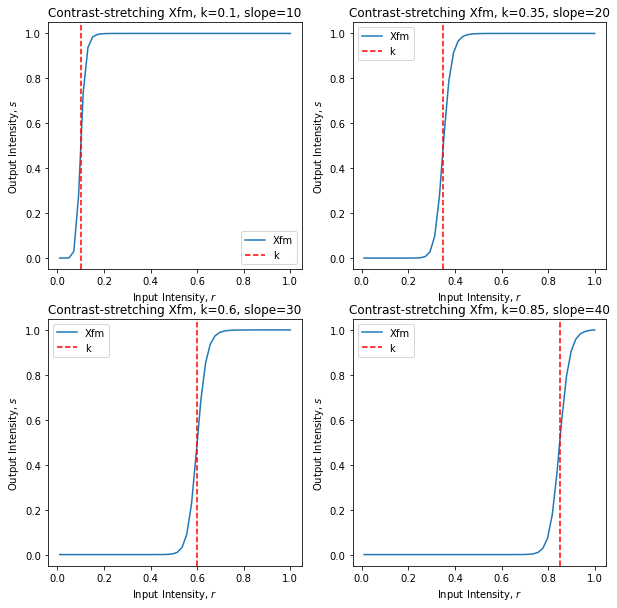

In [5]:
#Plotting the contrast-stretching transformation
cntrst_strt_xfm = lambda inten, k, slope : 1/(1 + np.power((k/inten),slope))

inten_in = np.linspace(0.01,1,endpoint=True) #generate vector of intensity values in range [0,1]
k = 0.5 #constant in log transformation
E = 20 #slope parameter in contrast stretching transformation

#Let's visualize the effect of the constant k and slope parameters
#k_lst = np.arange(0.1,1,step=0.25)
k_lst = [0.1, 0.35, 0.6, 0.85]
slope_lst = np.arange(10,50,step=10)

fig_cntrst_strt_xfm, ax_cntrst_strt_xfm = plt.subplots(2,2, figsize=(10,10)); ax_cntrst_strt_xfm = ax_cntrst_strt_xfm.ravel()

for idx, (k, slope) in enumerate(zip(k_lst, slope_lst)):
    ax_cntrst_strt_xfm[idx].plot(inten_in, cntrst_strt_xfm(inten_in, k, slope)); 
    ax_cntrst_strt_xfm[idx].set_title('Contrast-stretching Xfm, k=%s, slope=%s' % (str(k),str(slope)));
    ax_cntrst_strt_xfm[idx].set_xlabel('Input Intensity, $r$'); ax_cntrst_strt_xfm[idx].set_ylabel('Output Intensity, $s$');
    ax_cntrst_strt_xfm[idx].axvline(x=k,linestyle='--',c='r'); ax_cntrst_strt_xfm[idx].legend(['Xfm','k'])

As seen from the plots above, as our slope parameter grows, its limit approaches a brickwall-like xfm. This limiting function is a ***thresholding function*** (see below).

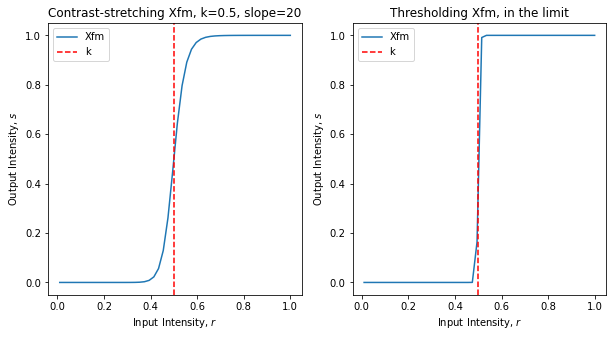

In [6]:
#plotting the thresholding function
fig_cntrst_strt_xfm2, ax_cntrst_strt_xfm2 = plt.subplots(1,2, figsize=(10,5)); ax_cntrst_strt_xfm2 = ax_cntrst_strt_xfm2.ravel()

k_lst = [0.5, 0.5]
slope_lst = [20,159]
for idx, (k, slope) in enumerate(zip(k_lst, slope_lst)):
    ax_cntrst_strt_xfm2[idx].plot(inten_in, cntrst_strt_xfm(inten_in, k, slope)); 
    ax_cntrst_strt_xfm2[idx].set_xlabel('Input Intensity, $r$'); ax_cntrst_strt_xfm2[idx].set_ylabel('Output Intensity, $s$');
    ax_cntrst_strt_xfm2[idx].axvline(x=k,linestyle='--',c='r'); ax_cntrst_strt_xfm2[idx].legend(['Xfm','k'])
    
ax_cntrst_strt_xfm2[0].set_title('Contrast-stretching Xfm, k=%s, slope=%s' % (str(k_lst[0]),str(slope_lst[0])));
ax_cntrst_strt_xfm2[1].set_title('Thresholding Xfm, in the limit');

In [7]:
#https://realpython.com/instance-class-and-static-methods-demystified/

**Example 3.3 - Illutration of custom function *intensity_xfms***

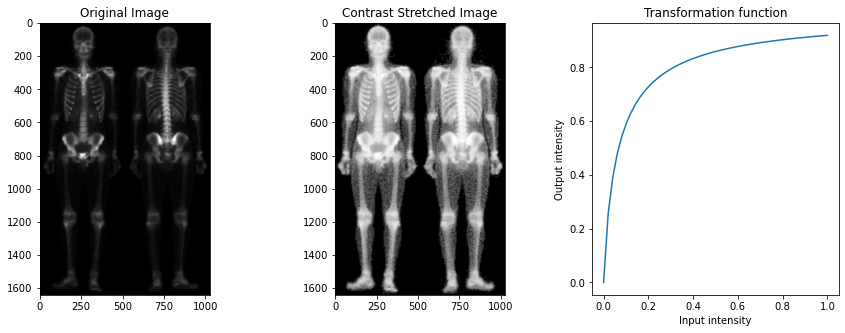

In [8]:
#import bone scan image
img_bone = io.imread('./images/bonescan.tif')

#convert to flaot image first
img_bone_flt = skimage.img_as_float(img_bone)

#compute input parameters for stretch transformation
m = np.mean(img_bone_flt)
E = 0.9
#perform stretch xfm
img_bone_strtch = ec_img_utils.intensity_xfms(img_bone_flt, 'stretch', {'k':m, 'slope':E})

#display the stretched image
fig_body_scan, ax_body_scan = plt.subplots(1,3,figsize=(15,5)); ax_body_scan = ax_body_scan.ravel()
ax_body_scan[0].imshow(img_bone,cmap='gray'); ax_body_scan[0].set_title('Original Image');
ax_body_scan[1].imshow(img_bone_strtch,cmap='gray'); ax_body_scan[1].set_title('Contrast Stretched Image');

#plotting contrast stretching function
inten_in = np.linspace(1e-10,1,endpoint=True) #generate vector of intensity values in range [0,1]
ax_body_scan[2].plot(inten_in, cntrst_strt_xfm(inten_in, m, E)); ax_body_scan[2].set_title('Transformation function')
ax_body_scan[2].set_xlabel('Input intensity'); ax_body_scan[2].set_ylabel('Output intensity');

Note how the transformation function stretched the intensity values in the lower end of the intensity scale and produced an enhanced X-ray image.

### Histogram Processing

The histogram of a digital image represents the approximate distribution of intensity values in the image. For a grayscale image with intensity values in the range $[0, G]$, the *unnormalized* histogram is defined as:

<center>$h(r_k) = n_k$</center>

where $r_k$ is the *k*th intensity level in the interval $[0, G]$ and $n_k$ is the number of pixels in the image with intensity $r_k$. This histogram is unnormalized. 

To get a *normalized* histogram, we simply divide by the number of pixels in our image. For an $M \times N$ image, we get:

<center>$p(r_k) = \Large \frac{h(r_k)}{M \times N} = \frac{n_k}{n}$</center>

From a probabilistic point of view, $p(r_k)$ is an estimate of the probability of intensity value $r_k$.

Image Information

 | Shape      | Data type   |      Bytes |
|------------|-------------|------------|
| (300, 451) | float64     | 1.0824e+06 |




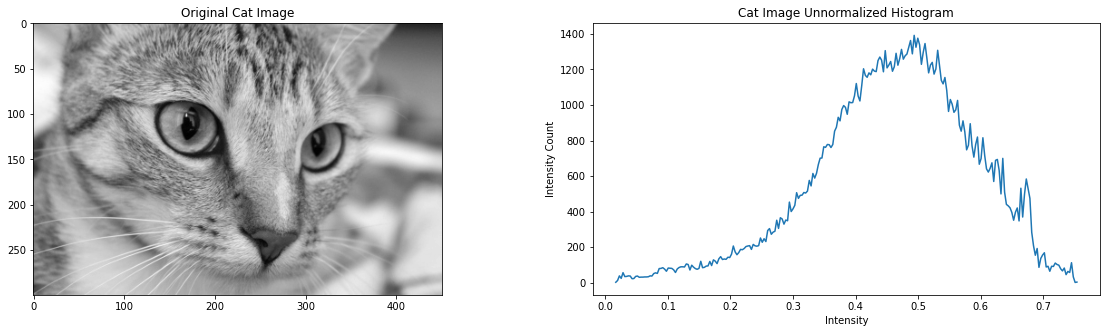

In [9]:
#Let's plot the histogram of an image

#load image from skimage
from skimage import data, color

#load cat image from skimage
img_cat = color.rgb2gray(data.chelsea())

#get image info
ec_img_utils.get_img_info(img_cat); print('\n')

#Let's plot the histogram for our cat image
hist_cat_orig, hist_cat_ctrs = skimage.exposure.histogram(img_cat)

fig_hist, ax_hist = plt.subplots(1,2,figsize=(20,5)); ax_hist = ax_hist.ravel()
ax_hist[0].imshow(img_cat,cmap='gray'); ax_hist[0].set_title('Original Cat Image');
ax_hist[1].plot(hist_cat_ctrs, hist_cat_orig); ax_hist[1].set_title('Cat Image Unnormalized Histogram');
ax_hist[1].set_xlabel('Intensity'); ax_hist[1].set_ylabel('Intensity Count');


**Histogram Equalization**

The goal of histogram equalization is typically image enhancement. We think of the intensity values as a random variable and the image's histogram as an estimate of the discrete probability distribution of the intensity values. The *histogram equalization transformation* of an intensity value $r_k$ into a corresponding random intensity value $s_k$ is defined as a scaling constant, $K$, times the *cumulative distribution function* of the RV $r$.

<center>$s_k = K \cdot CDF(r_k)$</center>

We know that the CDF is defined as:

<center>$CDF(r_k) = \sum_{j=0}^{k} p(r_k) $</center>

Thus, our transformation functions is

<center>$s_k = T(r_k) = K \cdot \sum_{j=0}^{k} p(r_k) $</center>

When $r$ is floating point in the range $[0,1]$, we set $K = 1$. For $r$ integer-valued in the range $[0, L-1]$, we set $K = L-1$.

**Example 3.5 from DIPUM - Histogram Equalization**

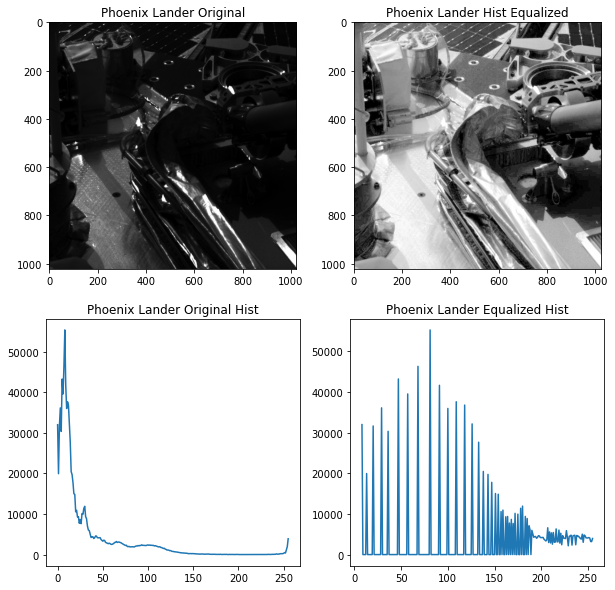

In [18]:
#load phoenix lander image
img_phnx_lndr = io.imread('./images/phoenix-lander.tif')

#display the phoenix lander image
fig_phnx, ax_phnx = plt.subplots(2,2,figsize=(10,10)); ax_phnx = ax_phnx.ravel()
ax_phnx[0].imshow(img_phnx_lndr,cmap='gray'); ax_phnx[0].set_title('Phoenix Lander Original');

#perform histogram equalization
img_phnx_eq = skimage.img_as_ubyte( skimage.exposure.equalize_hist(img_phnx_lndr, nbins=256))


#display hist equalized image
ax_phnx[1].imshow(img_phnx_eq,cmap='gray'); ax_phnx[1].set_title('Phoenix Lander Hist Equalized');

#display histograms
hist_phx_orig, hist_phx_ctrs = skimage.exposure.histogram(img_phnx_lndr)
hist_phx_eq, hist_phx_eq_ctrs = skimage.exposure.histogram(img_phnx_eq)

ax_phnx[2].plot(hist_phx_ctrs,hist_phx_orig); ax_phnx[2].set_title('Phoenix Lander Original Hist');
ax_phnx[3].plot(hist_phx_eq_ctrs,hist_phx_eq); ax_phnx[3].set_title('Phoenix Lander Equalized Hist');

Note how histogram equalization brings out details that were not visible in the original image. We can verify that the intensity distribution is more evenly distributed in the [0,256] range from the histogram plots shown above.

Let's plot the transformation function corresponding to this histogram equalization transformation.

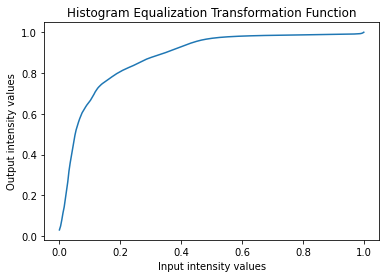

In [25]:
#Compute normalized histogram 
hist_phx_norm = hist_phx_orig / (img_phnx_lndr.shape[0]*img_phnx_lndr.shape[1])
#print(hist_phx_norm[0:10])

#compute CDF as the cumulative sum
phx_cdf = np.cumsum(hist_phx_norm)

#plot the CDF
fig_cdf, ax_cdf = plt.subplots(1,1)
ax_cdf.plot(np.linspace(0,1,num=256,endpoint=True), phx_cdf)
ax_cdf.set_title('Histogram Equalization Transformation Function'); ax_cdf.set_xlabel('Input intensity values');
ax_cdf.set_ylabel('Output intensity values');

**Histogram Matching**

Histogram matching is useful when we need to 'calibrate' an image's histogram against another's. For example, in medical imaging, we may have a 'golden' image that is used to transform subsequent images. 

**Example 3.6 from DIPUM - Histogram Matching**

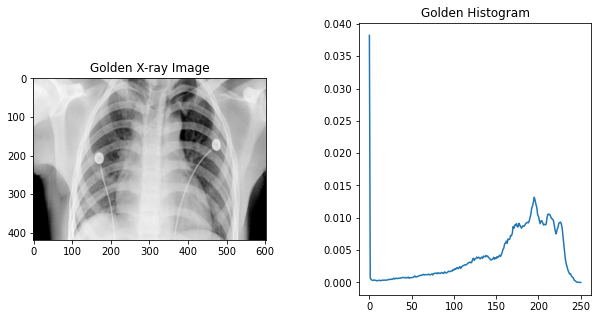

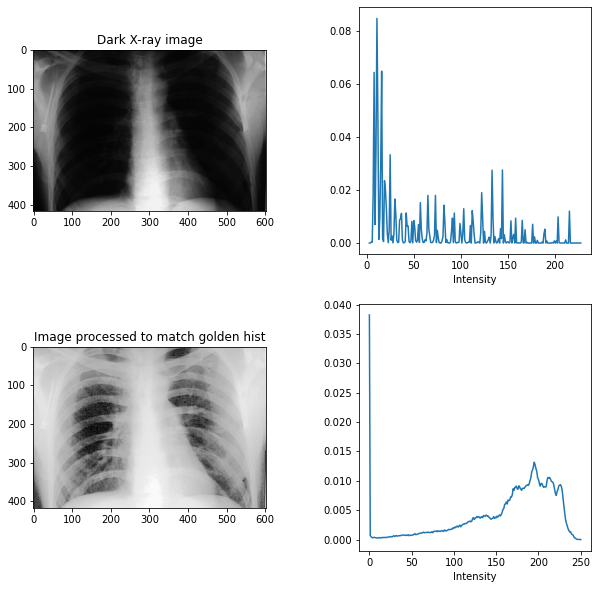

In [53]:
#load dark X-ray image
img_xray_dark = io.imread('./images/chestXray-dark.tif')

#compute histogram
hist_xray_dark, hist_xray_dark_ctrs = skimage.exposure.histogram(img_xray_dark,normalize=True) 

#load golden X-ray image
img_xray_golden = io.imread('./images/chestXray2-cropped.tif')

#display golden image
fig_golden, ax_golden = plt.subplots(1,2,figsize=(10,5)); ax_golden = ax_golden.ravel()
ax_golden[0].imshow(img_xray_golden,cmap='gray'); ax_golden[0].set_title('Golden X-ray Image')

#compute golden image's histogram and plot
hist_gold, hist_gold_ctr = skimage.exposure.histogram(img_xray_golden,normalize=True)
ax_golden[1].plot(hist_gold_ctr,hist_gold); ax_golden[1].set_title('Golden Histogram')

#compute histogram for golden image
hist_xray_golden, hist_xray_golden_ctrs = skimage.exposure.histogram(img_xray_golden,normalize=True) 
fig_golden.subplots_adjust(wspace = 0.4)

#apply histogram matching xfm
img_xray_hist_match = skimage.exposure.match_histograms(img_xray_dark, reference = img_xray_golden)

#display both images and their histograms
fig_hist_match, ax_hist_match = plt.subplots(2,2,figsize=(10,10)); ax_hist_match = ax_hist_match.ravel()

ax_hist_match[0].imshow(img_xray_dark,cmap='gray'); ax_hist_match[0].set_title('Dark X-ray image');
ax_hist_match[1].plot(hist_xray_dark_ctrs, hist_xray_dark); ax_hist_match[1].set_xlabel('Intensity'); #ax_hist_match[1].set_ylabel('Intensity Count');

ax_hist_match[2].imshow(img_xray_hist_match,cmap='gray'); ax_hist_match[2].set_title('Image processed to match golden hist');
ax_hist_match[3].plot(hist_xray_golden_ctrs, hist_xray_golden); ax_hist_match[3].set_xlabel('Intensity'); #ax_hist_match[3].set_ylabel('Intensity Count');

fig_hist_match.subplots_adjust(wspace = 0.4)
